# Logistic Regression Using TensorFlow and Keras
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, TensorFlow, Keras, Scikit-Learn, TeX, Jupyter Notebook

**Discipline(s):** Machine Learning, Logistic Regression, Classification

**Keywords:** `classification`, `logistic-regression`, `machine-learning`

This notebook proivdes an implementation of binary classification with logistic regression using *TensorFlow* and *Keras*.

## 1. Import Statements
---

Here, we will be using both the *NumPy* and *Matplotlib* Python libraries.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Further, we also need to import *TensorFlow*.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.2.0


## 2. Random Data Generation
---


We then need to generate data for our model. First, we specify the parameters used in our random data generation function.

In [ ]:
# Random Data Parameters
weight = 20
bias = 10
mu = 20
sigma = 6
m = 1000

The data for implementing logistic regression is then generated randomly with two features, $x_1$ and $x_2$. This function returns a `data` array of shape $(m, 2)$ and a `labels` array of shape $(m, 1)$.

The data is generated as follows:

*   Feature $x_1$: Chosen uniformly at random in the interval $[0, 1)$.
*   Feature $x_2$: Chosen with the formula $x_2 = w * x_1 + b - 1^c * n$, where the "noise" `n` is chosen according to the normal distribution with mean $\mu$ and standard deviation $\sigma$.
*   Class Labels: Choose $c = 0$ with probability $\frac{1}{2}$ or $c = 1$ with probability $\frac{1}{2}$.

In [ ]:
def get_random_data(w, b, mu, sigma, m):

  data = np.empty([m, 2])
  labels = np.empty([m, 1], dtype=int)

  for i in range(m):

    # Choose either 0 or 1 for the label.
    labels[i] = np.random.choice([0, 1], p=[0.5, 0.5])

    # Set the first feature.
    data[i, 0] = np.random.default_rng().uniform(0, 1)

    # Set the second feature.
    n = np.random.default_rng().normal(mu, sigma)
    data[i, 1] = w * data[i, 0] + b + (-1) ** labels[i] * n

  return data, labels

In [ ]:
data, labels = get_random_data(weight, bias, mu, sigma, m)

Then, we can use *Matplotlib* to display the data generated by our function.

In [ ]:
def display_random_data(data, labels):

  # Define the classes and colors.
  classes = ['1', '0']
  colors = ['red', 'blue']

  # Generate the scatter plot.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
  
  # Format the title and axis labels.
  plt.title('Randomly-Generated Data', fontsize=14)
  plt.xlabel(r'$ x_1 $', fontsize=14)
  plt.ylabel(r'$ x_2 $', fontsize=14)

  # Include a legend.
  plt.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=8)

  plt.show()

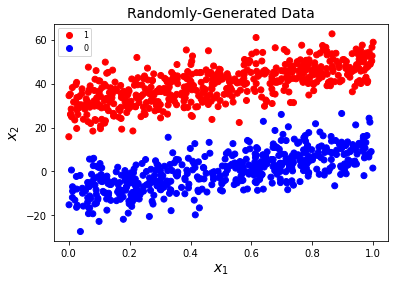

In [ ]:
display_random_data(data, labels)

## 3. Split the Data into Training and Test Sets
---

Once we have our data generated, we need to split it into training and test sets. Here, we use 80% of our data for training, and the remaining 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, train_size=0.8)

## 4. Logistic Regression
---

Now we're ready to implement Logistic Regression using *TensorFlow* and *Keras*. A prediction model is built and trained, and is then displayed with the original data. The loss function used is *binary cross-entropy loss*.

We first have to build our model using *Keras*. Here, we use a dense layer with sigmoid activation for our model.

In [ ]:
def build_model():

  # Build the model.
  model = tf.keras.Sequential()

  # Add a dense layer with sigmoid activation.
  model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Then, we can compile our model using binary cross-entropy loss as our loss function.

In [ ]:
def compile_model(model):

  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
compile_model(model)

After compiling the model, we are ready to train it using our data.

In [ ]:
history = model.fit(data_train, labels_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 0s 1ms/step - loss: 27.7078 - accuracy: 0.2450
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 27.1033 - accuracy: 0.2450
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 26.5409 - accuracy: 0.2450
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 25.9834 - accuracy: 0.2450
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 25.4303 - accuracy: 0.2450
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 24.8755 - accuracy: 0.2438
Epoch 7/250
25/25 [==============================] - 0s 1ms/step - loss: 24.3168 - accuracy: 0.2425
Epoch 8/250
25/25 [==============================] - 0s 1ms/step - loss: 23.7577 - accuracy: 0.2412
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 23.1993 - accuracy: 0.2400
Epoch 10/250
25/25 [==============================] - 0s 1ms/step - loss: 22.6429 - accuracy: 0.2400

We then need to extract the weight, or $\theta$, values produced by our model. Here, `get_weights()` is used to get the weights and bias into an array.

In [ ]:
weights = model.get_weights()

w1 = weights[0][0][0]
w2 = weights[0][1][0]
b = weights[1][0]

print(w1, w2, b)

2.7945654 -0.25499576 3.3457925


Using the testing data and labels, the model can then be analyzed to measure the total loss and accuracy.

In [ ]:
results = model.evaluate(data_test, labels_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 1.0000


Once our model is trained, we can visualize it with the original data. We can use the model to get a new separating line. To it, we use the function `get_separating_line()`, which sets $w_1x_1 + w_2x_2 + b = 0$. From there, it simply solves for $x_2$ to get the sepatating line when the sigmoid function is $1/2$.

In [ ]:
def get_separating_line(w1, w2, b):

  return -(w1 * 0.5 + b) / w2

In [ ]:
def display_model_data(data, labels):

  # Define the classes and colors.
  classes = ['0', '1']
  colors = ['red', 'blue']

  # Generate the scatter plot.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
  
  # Format the title and axis labels
  plt.title('Trained Model with TensorFlow and Keras', fontsize=14)
  plt.xlabel('$ x_1 $', fontsize=14)
  plt.ylabel('$ x_2 $', fontsize=14)

  # Inlcude a legend.
  plt.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=8)

  # Plot the true line used to generate the data.
  x = np.linspace(0,1,100)
  y = weight * x + bias
  plt.plot(x, y)

  # Plot the separating line of the trained model.
  separating_line = get_separating_line(w1, w2, b)
  print(separating_line)
  y = separating_line * x + b
  plt.plot(x, y)

  plt.show()

18.6006041440175


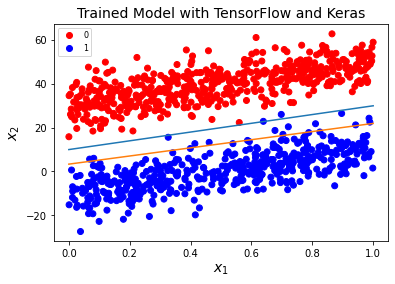

In [ ]:
display_model_data(data, labels)

Finally, we can visualize the model with a heatmap, using the original weights and bias and the sigmoid function.


In [ ]:
def sigmoid(x):
  
  return 1 / (1 + np.exp(-x))

In [ ]:
def display_heatmap(w1, w2, b):

  # Get the data for the heatmap.
  x1, x2 = np.meshgrid(np.linspace(0, 1, 200), np.linspace(-20, 60, 200))
  z = sigmoid(w1 * x1 + w2 * x2 + b)

  # Set the bounds for z.
  z = z[:-1, :-1]
  z_min, z_max = -np.abs(z).max(), np.abs(z).max()

  # Generate the heatmap.
  fig, ax = plt.subplots()
  c = ax.pcolormesh(x1, x2, z, cmap='RdBu', vmin=0, vmax=1)
  ax.set_title('Trained Model with TensorFlow and Keras', fontsize=14)
  fig.colorbar(c, ax=ax)
  plt.xlabel(r'$ x_1 $', fontsize=14)
  plt.ylabel(r'$ x_2 $', fontsize=14)
  
  # Set the limits of the plot.
  ax.axis([x1.min(), x1.max(), x2.min(), x2.max()])

  plt.show()

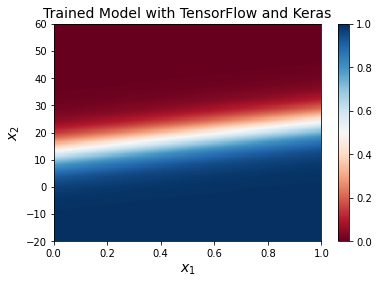

In [ ]:
display_heatmap(w1, w2, b)